In [ ]:
%reset -f

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc, RocCurveDisplay , roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# **EDA**

In [ ]:
df = pd.read_csv("/content/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.shape

(891, 12)

# **Preprocessing**

In [ ]:
df.drop(['PassengerId','Name','Parch','Ticket','Cabin'],axis =1,inplace= True)

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S
887,1,1,female,19.0,0,30.0000,S
888,0,3,female,NaN,1,23.4500,S
889,1,1,male,26.0,0,30.0000,C


In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Fare,0
Embarked,2


In [ ]:
df['Age'].fillna(df['Age'].mean())

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Fare,0
Embarked,0


In [ ]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [ ]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


# Question1

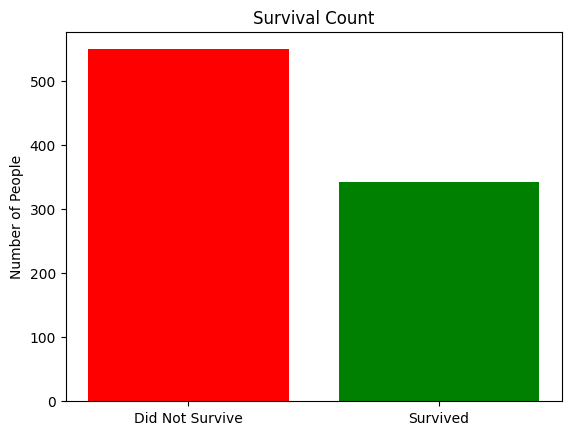

In [ ]:
counts = df['Survived'].value_counts().sort_index()
labels = ['Did Not Survive', 'Survived']
plt.bar(labels, counts, color=['red', 'green'])
plt.title('Survival Count')
plt.ylabel('Number of People')
plt.show()

# Question 2

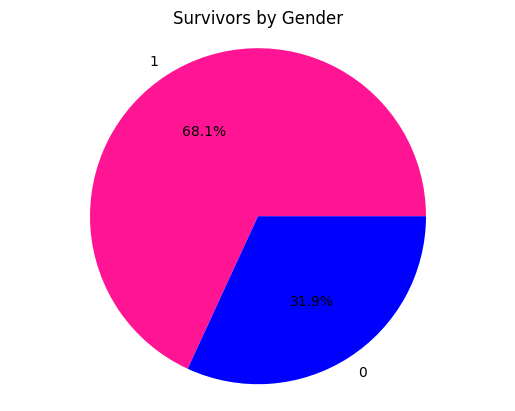

In [ ]:
survived = df[df['Survived'] == 1]
sex_counts = survived['Sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['deeppink', 'blue'])
plt.title('Survivors by Gender')
plt.axis('equal')
plt.show()

# Question 3

In [ ]:
counts = df['Pclass'].value_counts()
counts

,count
Pclass,
3,491
1,216
2,184


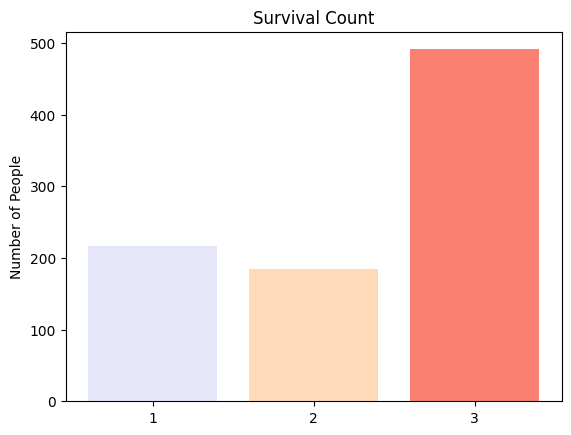

In [ ]:
counts = df['Pclass'].value_counts().sort_index()
labels = ['1', '2', '3']
plt.bar(labels, counts, color=['lavender', 'peachpuff', 'salmon'])
plt.title('Survival Count')
plt.ylabel('Number of People')
plt.show()

# Question 4

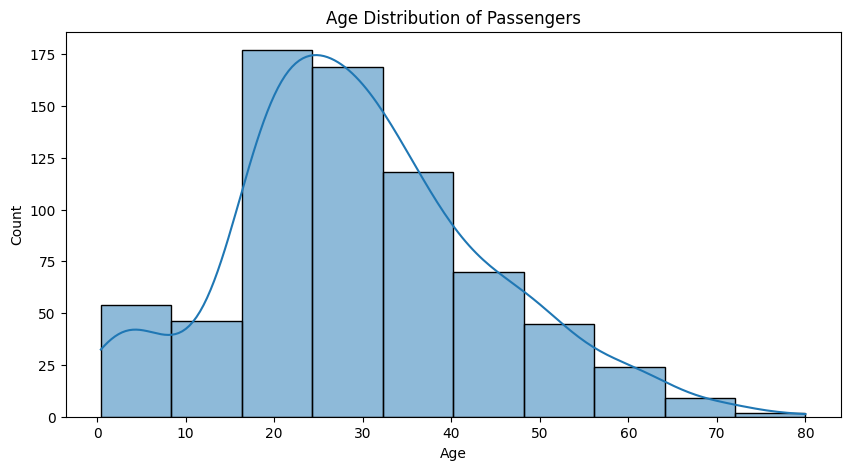

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
avg_ages = df.groupby('Survived')['Age'].mean()
print("Average Age by Survival Status:")
print(avg_ages)

Average Age by Survival Status:
Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


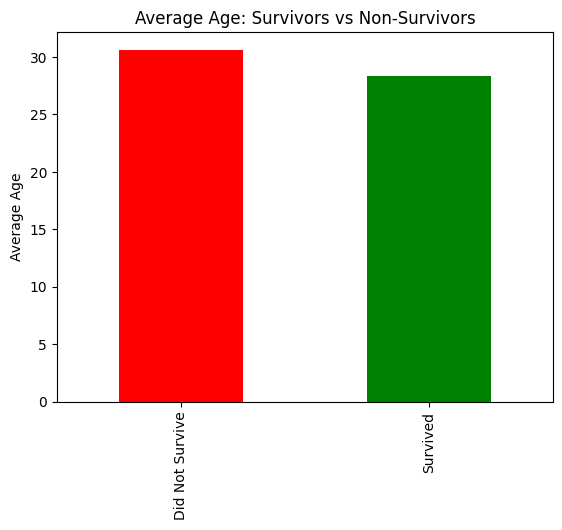

In [ ]:
avg_ages.index = ['Did Not Survive', 'Survived']
avg_ages.plot(kind='bar', color=['red', 'green'])
plt.ylabel('Average Age')
plt.title('Average Age: Survivors vs Non-Survivors')
plt.show()

# Question 5

In [ ]:
df['HasFamily'] = ((df['SibSp'] > 0))

survival_rates = df.groupby('HasFamily')['Survived'].mean()

print("Survival Rates:")
print(survival_rates)

Survival Rates:
HasFamily
False    0.345395
True     0.466431
Name: Survived, dtype: float64


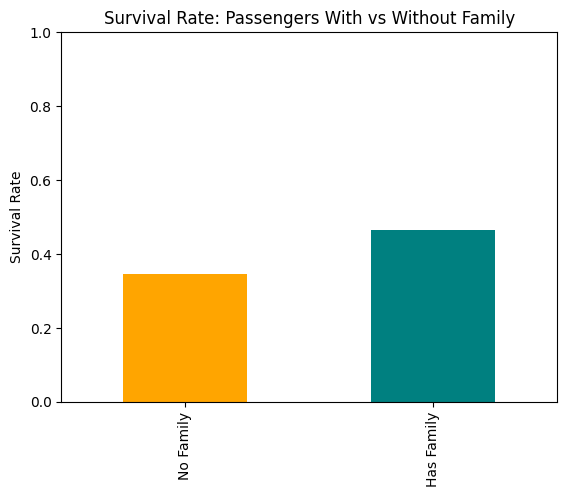

In [ ]:
survival_rates.index = ['No Family', 'Has Family']
survival_rates.plot(kind='bar', color=['orange', 'teal'])
plt.ylabel('Survival Rate')
plt.title('Survival Rate: Passengers With vs Without Family')
plt.ylim(0, 1)
plt.show()

# Question 6

In [ ]:
average_fare = df['Fare'].mean()

df['PaidAboveAverage'] = df['Fare'] > average_fare

survival_rate_above_avg = df[df['PaidAboveAverage']]['Survived'].mean()

print(f"Average fare: {average_fare:.2f}")
print(f"Survival rate for passengers who paid more than average: {survival_rate_above_avg:.2%}")

Average fare: 32.20
Survival rate for passengers who paid more than average: 59.72%


# Question 7

In [ ]:
conditions = [
    df['Age'] < 16,
    df['Age'] > 60
]
choices = ['Child', 'Senior']

df['AgeGroup'] = np.select(conditions, choices, default='Adult')

print(df)

     Survived  Pclass  Sex   Age  SibSp     Fare  Embarked  HasFamily  \
0           0       3    0  22.0      1   7.2500         0       True   
1           1       1    1  38.0      1  71.2833         1       True   
2           1       3    1  26.0      0   7.9250         0      False   
3           1       1    1  35.0      1  53.1000         0       True   
4           0       3    0  35.0      0   8.0500         0      False   
..        ...     ...  ...   ...    ...      ...       ...        ...   
886         0       2    0  27.0      0  13.0000         0      False   
887         1       1    1  19.0      0  30.0000         0      False   
888         0       3    1   NaN      1  23.4500         0       True   
889         1       1    0  26.0      0  30.0000         1      False   
890         0       3    0  32.0      0   7.7500         2      False   

     PaidAboveAverage AgeGroup  
0               False    Adult  
1                True    Adult  
2               False   

# Question 8

In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Fare,0
Embarked,0
HasFamily,0
PaidAboveAverage,0
AgeGroup,0


# Question 9

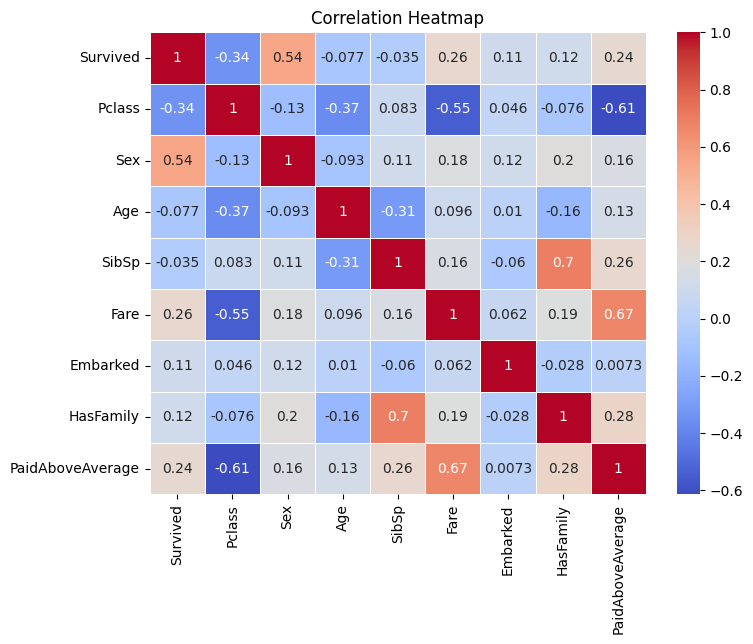

In [ ]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Question 10

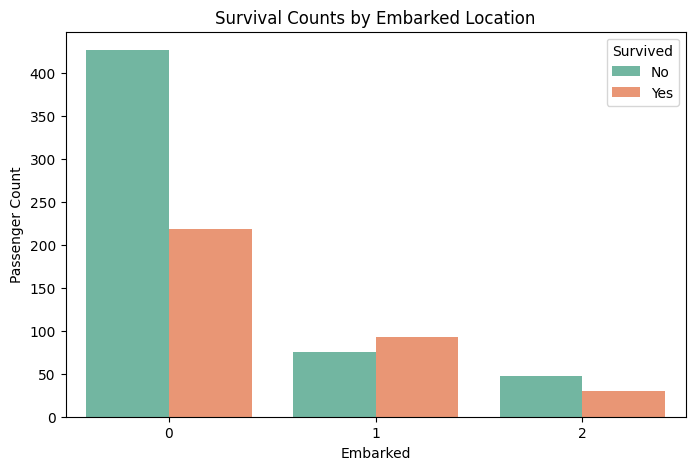

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Embarked', hue='Survived', palette='Set2')
plt.title('Survival Counts by Embarked Location')
plt.xlabel('Embarked')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [ ]:
survival_rate = df.groupby('Embarked')['Survived'].mean()

print("Survival Rate by Embarked Location:")
print(survival_rate)

Survival Rate by Embarked Location:
Embarked
0    0.339009
1    0.553571
2    0.389610
Name: Survived, dtype: float64


# **Question 11**

In [ ]:
df = pd.get_dummies(df, columns=['AgeGroup'], drop_first=True)

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
decision_tree_prediction = decision_tree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, decision_tree_prediction))
print("\nClassification Report:\n", classification_report(y_test, decision_tree_prediction))

Accuracy: 0.7988826815642458

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# Question 12

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

random_forest_prediction = random_forest.predict(X_test)
print(" Accuracy:", accuracy_score(y_test, random_forest_prediction))
print("\n Classification Report:\n", classification_report(y_test, random_forest_prediction))

 Accuracy: 0.8324022346368715

 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



# Question 13

In [ ]:
xgb_model = XGBClassifier( eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

xgb_prediction = xgb_model.predict(X_test)

print(" Accuracy:", accuracy_score(y_test, xgb_prediction ))
print("\n Classification Report:\n", classification_report(y_test, xgb_prediction ))

 Accuracy: 0.8212290502793296

 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# Question 14

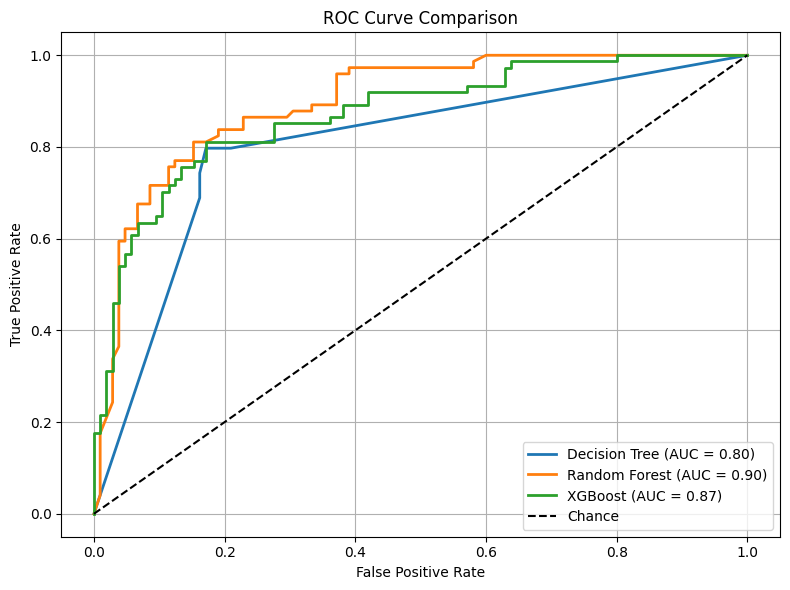

In [ ]:
# 1. Get predicted probabilities for class 1 (Survived)
y_proba_dt = decision_tree.predict_proba(X_test)[:, 1]
y_proba_rf = random_forest.predict_proba(X_test)[:, 1]
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# 2. Compute ROC curve and AUC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

auc_dt = roc_auc_score(y_test, y_proba_dt)
auc_rf = roc_auc_score(y_test, y_proba_rf)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)

# 3. Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})", linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", linewidth=2)
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})", linewidth=2)

# Diagonal (random guess)
plt.plot([0, 1], [0, 1], 'k--', label="Chance")

# Labels and style
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Question 15

In [ ]:
scores_dt = cross_val_score(decision_tree, X, y, cv=5, scoring='accuracy')
scores_rf = cross_val_score(random_forest, X, y, cv=5, scoring='accuracy')
scores_xgb = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')

# Print results
print(f"Decision Tree: Mean = {scores_dt.mean():.4f}, Std = {scores_dt.std():.4f}")
print(f"Random Forest: Mean = {scores_rf.mean():.4f}, Std = {scores_rf.std():.4f}")
print(f"XGBoost: Mean = {scores_xgb.mean():.4f}, Std = {scores_xgb.std():.4f}")


Decision Tree: Mean = 0.7733, Std = 0.0209
Random Forest: Mean = 0.8114, Std = 0.0183
XGBoost: Mean = 0.8103, Std = 0.0232


Lower std = more stable model,,,,
Higher mean = more accurate model

# Question 16

In [ ]:
print("Decision Tree:\n", confusion_matrix(y_test, decision_tree_prediction))
print("\nRandom Forest:\n", confusion_matrix(y_test, random_forest_prediction))
print("\nXGBoost:\n", confusion_matrix(y_test, xgb_prediction ))

Decision Tree:
 [[88 17]
 [19 55]]

Random Forest:
 [[93 12]
 [18 56]]

XGBoost:
 [[91 14]
 [18 56]]


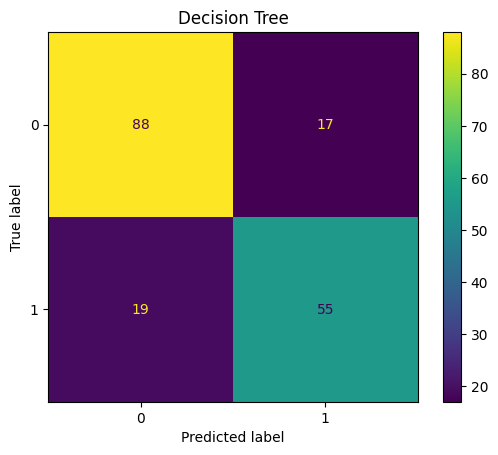

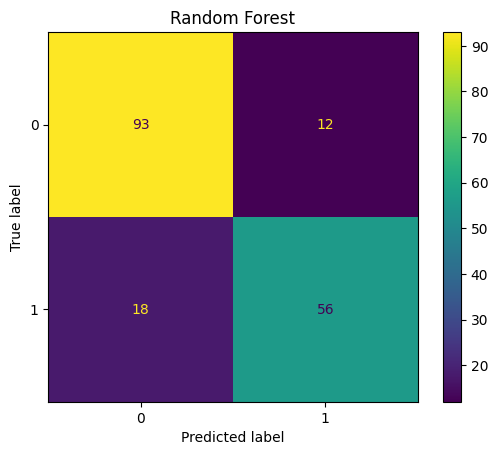

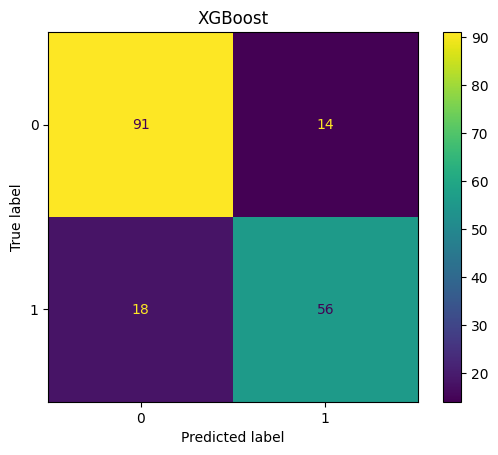

In [ ]:
ConfusionMatrixDisplay.from_estimator(decision_tree, X_test, y_test)
plt.title("Decision Tree")
plt.show()

ConfusionMatrixDisplay.from_estimator(random_forest, X_test, y_test)
plt.title("Random Forest")
plt.show()

ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title("XGBoost")
plt.show()

# Question 17

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Optional: use subset of training data for speed
X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, train_size=0.3, random_state=42)

grid_search.fit(X_train_sub, y_train_sub)

print("Best Parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy with best parameters:", accuracy)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test set accuracy with best parameters: 0.8044692737430168


# Question 18

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=xgb_model , param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_xgb = grid_search.best_estimator_

xgb_prediction = best_xgb.predict(X_test)

accuracy = accuracy_score(y_test, xgb_prediction)
print("Test set accuracy with best parameters:", accuracy)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Test set accuracy with best parameters: 0.8100558659217877
